A notebook to trace the as-built L2 throughput, starting with the source in Docushare, Document-17872, and displaying exactly what is used and how.


- S. Ritz updated 17 July 2018

In [1]:
import matplotlib.pyplot as plt
import datetime
import collections
import numpy as np
import argparse
import pandas as pd
from pandas import ExcelFile
from pandas import ExcelWriter
import os
import glob
import matplotlib.pyplot as plt
import scipy as sc
import scipy.signal
import textwrap
import pylab as pl

# this magic command makes plots appear within the notebook
%matplotlib inline

# avoid an annoying warning
plt.rcParams.update({'figure.max_open_warning': 0})

# define figure size parameters to make figures larger than default
figwidth=30
figheight=10


(0.85, 1.05)

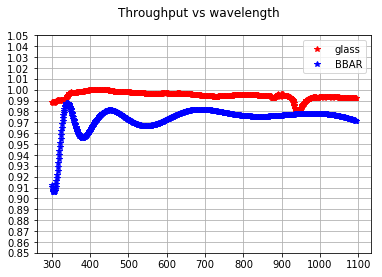

In [2]:
xl = pd.ExcelFile("Document-17872.xlsx")
#xl.sheet_names
df = xl.parse("Performance summary as-built")
#df['wavelength'], df['L2 glass']
df.drop(df.index[[0,1,2,3,4]])
#df['wavelength'][5:]
#df['L2 glass'][5:]
fig1=plt.figure()
plt.plot(df['wavelength'][5:800], df['L2 glass'][5:800], 'r*', label='glass')
plt.plot(df['wavelength'][5:800], df['L2 BBAR'][5:800], 'b*', label='BBAR')
plt.suptitle('Throughput vs wavelength')
ax=fig1.gca()
ax.grid(True)
ax.set_xticks(np.arange(300, 1200, 100.))
ax.set_yticks(np.arange(0., 2., 0.01))
pl.legend()
plt.ylim(0.85,1.05)



The current SE calculations want text files from 300 nm to 1100 nm in 1nm steps. Let's write that.

In [3]:
file1 = open("l2-glass.txt","w")
for i in range(len(df)):
    if ((df['wavelength'][i]>299.) & (df['wavelength'][i]<1101.)):
        #print (round(df['wavelength'][i],1),round(df['L2 glass'][i],4))
        print (round(df['wavelength'][i],1),round(df['L2 glass'][i],4), file=file1)
file1.close()

In [4]:
file2 = open("l2-BBAR.txt","w")
for i in range(len(df)):
    if ((df['wavelength'][i]>299.) & (df['wavelength'][i]<1101.)):
        #print (round(df['wavelength'][i],1),round(df['L2 BBAR'][i],4))
        print (round(df['wavelength'][i],1),round(df['L2 BBAR'][i],4), file=file2)
file2.close()